In [1]:
from datasets import load_dataset

ds = load_dataset("iamvastava/underwater_image_enhancement", cache_dir = 'datatset')

In [2]:
import os
import random
from tqdm import tqdm
from torchvision.utils import save_image
from torchvision import transforms

# === Settings ===
dataset = ds["train"]  # your HuggingFace dataset
output_dir = "/tmp/cyclegan_dataset"  # CHANGE THIS PATH
split_ratio = 0.9  # train/val split

# === Create output directories ===
for subdir in ["trainA", "trainB", "testA", "testB"]:
    os.makedirs(os.path.join(output_dir, subdir), exist_ok=True)

# === Collect paired A-B images in one pass ===
a_images = []
b_images = []

for row in tqdm(dataset, desc="Filtering"):
    label = row["label"]
    if label == 1:
        a_images.append(row["image"])
    elif label == 2:
        b_images.append(row["image"])

# === Check and zip ===
assert len(a_images) == len(b_images), f"A: {len(a_images)} | B: {len(b_images)} mismatch"
paired = list(zip(a_images, b_images))
random.shuffle(paired)

# === Split train/val ===
split_idx = int(len(paired) * split_ratio)
train_pairs = paired[:split_idx]
val_pairs = paired[split_idx:]

# === Save function ===
to_tensor = transforms.ToTensor()

def save_pairs(pairs, folder_a, folder_b, label):
    print(f"Saving {label} images...")
    for i, (a, b) in enumerate(tqdm(pairs)):
        save_image(to_tensor(a), os.path.join(folder_a, f"{i:04}.png"))
        save_image(to_tensor(b), os.path.join(folder_b, f"{i:04}.png"))

# === Save all ===
save_pairs(train_pairs, f"{output_dir}/trainA", f"{output_dir}/trainB", "train")
save_pairs(val_pairs, f"{output_dir}/testA", f"{output_dir}/testB", "val")

print(f"✅ Dataset ready at: {output_dir}")


Filtering: 100%|██████████| 14069/14069 [31:46<00:00,  7.38it/s]


Saving train images...


100%|██████████| 5515/5515 [03:53<00:00, 23.62it/s]


Saving val images...


100%|██████████| 613/613 [00:25<00:00, 23.94it/s]

✅ Dataset ready at: /tmp/cyclegan_dataset


In [4]:
import shutil

os.makedirs('pytorch-CycleGAN-and-pix2pix/cyclegan_dataset', exist_ok=True)

# Copy the full directory recursively
shutil.copytree(output_dir, 'pytorch-CycleGAN-and-pix2pix/cyclegan_dataset', dirs_exist_ok=True)

print(f"✅ Copied to: {'pytorch-CycleGAN-and-pix2pix/cyclegan_dataset'}")

✅ Copied to: pytorch-CycleGAN-and-pix2pix/cyclegan_dataset


Showing 5 pairs from:
A: pytorch-CycleGAN-and-pix2pix/cyclegan_dataset/trainA
B: pytorch-CycleGAN-and-pix2pix/cyclegan_dataset/trainB


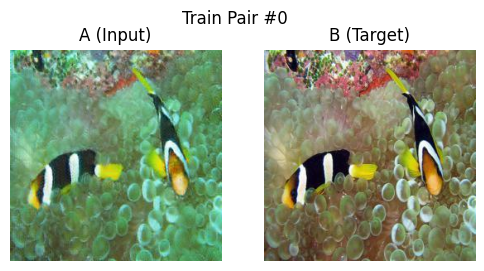

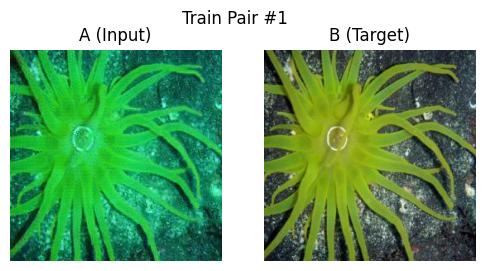

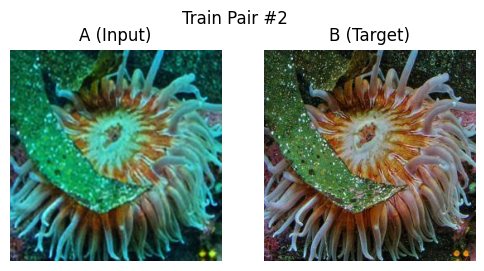

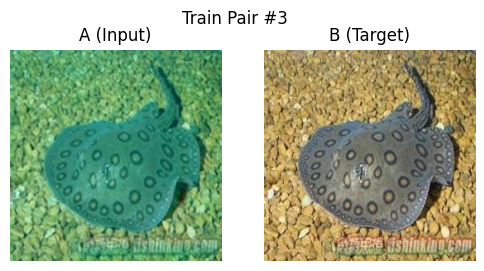

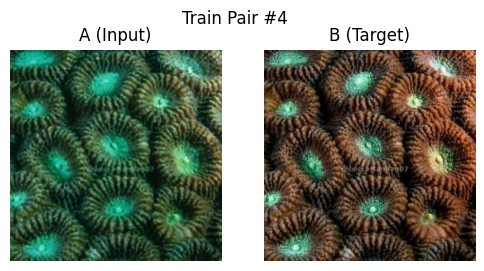

Showing 5 pairs from:
A: pytorch-CycleGAN-and-pix2pix/cyclegan_dataset/testA
B: pytorch-CycleGAN-and-pix2pix/cyclegan_dataset/testB


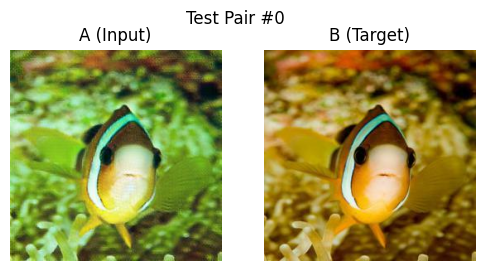

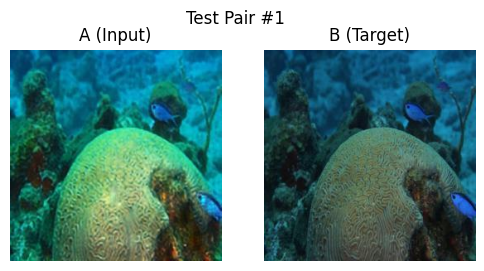

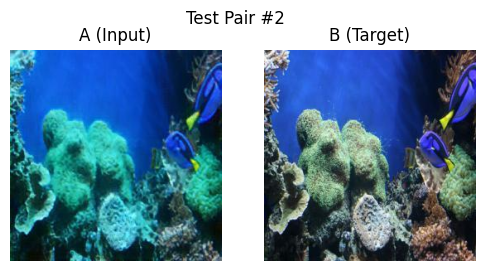

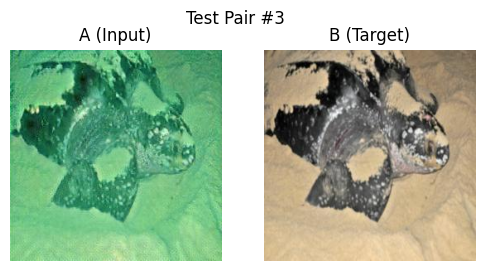

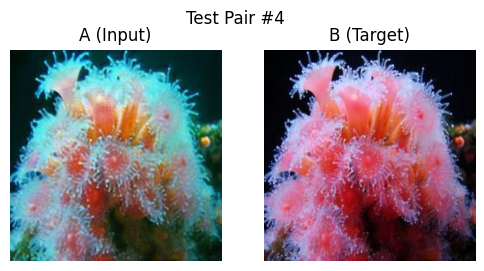

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_sample_pairs(folder_a, folder_b, num=5, title="Samples"):
    a_files = sorted(os.listdir(folder_a))
    b_files = sorted(os.listdir(folder_b))
    
    print(f"Showing {num} pairs from:\nA: {folder_a}\nB: {folder_b}")
    
    for i in range(num):
        a_img = Image.open(os.path.join(folder_a, a_files[-i]))
        b_img = Image.open(os.path.join(folder_b, b_files[-i]))
        
        plt.figure(figsize=(6, 3))
        plt.suptitle(f"{title} Pair #{i}", fontsize=12)
        
        plt.subplot(1, 2, 1)
        plt.imshow(a_img)
        plt.title("A (Input)")
        plt.axis("off")
        
        plt.subplot(1, 2, 2)
        plt.imshow(b_img)
        plt.title("B (Target)")
        plt.axis("off")
        
        plt.show()

# === Run this for training pairs
show_sample_pairs(
    "pytorch-CycleGAN-and-pix2pix/cyclegan_dataset/trainA",
    "pytorch-CycleGAN-and-pix2pix/cyclegan_dataset/trainB",
    num=5,
    title="Train"
)

# === Run this for validation pairs
show_sample_pairs(
    "pytorch-CycleGAN-and-pix2pix/cyclegan_dataset/testA",
    "pytorch-CycleGAN-and-pix2pix/cyclegan_dataset/testB",
    num=5,
    title="Test"
)
